# Loan Default EDA
Run this top-to-bottom. It loads data and draw graphes

In [1]:

from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 200)

def smart_read_csv(p: Path) -> pd.DataFrame:
    with open(p, 'r', encoding='utf-8', errors='ignore') as f:
        first = f.readline()
        second = f.readline()
    return pd.read_csv(p, skiprows=1) if ('bad_flag' in second and 'bad_flag' not in first) else pd.read_csv(p)

train_candidates = [Path('../data/training_loan_data.csv'), Path('./data/training_loan_data.csv'), Path('training_loan_data.csv')]
test_candidates  = [Path('../data/testing_loan_data.csv'),  Path('./data/testing_loan_data.csv'),  Path('testing_loan_data.csv')]

def pick_first_existing(paths):
    for p in paths:
        if p.exists():
            return p
    return None

train_path = pick_first_existing(train_candidates)
test_path  = pick_first_existing(test_candidates)
print("Using train path:", train_path)
print("Using test  path:", test_path)
if train_path is None:
    raise FileNotFoundError("Could not find training_loan_data.csv. Put it in repo_root/data/.")

df = smart_read_csv(train_path)
df.head()

Using train path: ..\data\training_loan_data.csv
Using test  path: ..\data\testing_loan_data.csv


,id,member_id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,desc,purpose,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,application_approved_flag,internal_score,bad_flag
0,10000001,11983056.0,7550,36 months,16.24%,3 years,RENT,28000.0,NaN,debt_consolidation,100.0,96.0,8.40,0.0,17.0,72%,4000.0,NaN,3828.953801,5759.0,1,99,0.0
1,10000002,12002921.0,27050,36 months,10.99%,10+ years,OWN,55000.0,Borrower added on 12/31/13 > Combining high ...,debt_consolidation,25.0,53.9,22.87,0.0,8.0,61.20%,35700.0,NaN,34359.940730,114834.0,1,353,0.0
2,10000003,11983096.0,12000,36 months,10.99%,4 years,RENT,60000.0,Borrower added on 12/31/13 > I would like to...,debt_consolidation,0.0,15.9,4.62,1.0,3.0,24%,18100.0,NaN,16416.617760,7137.0,1,157,0.0
3,10000004,12003142.0,28000,36 months,7.62%,5 years,MORTGAGE,325000.0,NaN,debt_consolidation,16.7,67.1,18.55,1.0,3.0,54.60%,42200.0,NaN,38014.149760,799592.0,1,365,0.0
4,10000005,11993233.0,12000,36 months,13.53%,10+ years,RENT,40000.0,NaN,debt_consolidation,33.3,79.6,16.94,0.0,17.0,68.80%,7000.0,53.0,6471.462236,13605.0,1,157,0.0


In [2]:
%pip install "numpy<2.3"
import numpy as np
np.__version__


Note: you may need to restart the kernel to use updated packages.


'2.2.6'

## 1) Shape & Schema

In [3]:

print("Shape:", df.shape)
df.info()


Shape: (199121, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199121 entries, 0 to 199120
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           199121 non-null  int64  
 1   member_id                    189457 non-null  float64
 2   loan_amnt                    199121 non-null  int64  
 3   term                         189457 non-null  object 
 4   int_rate                     189457 non-null  object 
 5   emp_length                   181531 non-null  object 
 6   home_ownership               189457 non-null  object 
 7   annual_inc                   189457 non-null  float64
 8   desc                         82004 non-null   object 
 9   purpose                      189457 non-null  object 
 10  percent_bc_gt_75             180419 non-null  float64
 11  bc_util                      180333 non-null  float64
 12  dti                          189457 no

In [4]:
df.describe(include='all').T.head(30)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,199121.0,NaN,NaN,NaN,10098566.911205,57043.972099,10000001.0,10049582.0,10098227.0,10148007.0,10197787.0
member_id,189457.0,NaN,NaN,NaN,5929625.920367,3339821.824345,151536.0,2308792.0,6060627.0,8727745.0,12098992.0
loan_amnt,199121.0,NaN,NaN,NaN,14071.947334,8067.076636,1000.0,8000.0,12000.0,19600.0,35000.0
term,189457,2,36 months,144800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
int_rate,189457,145,12.12%,9408,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_length,181531,11,10+ years,61648,NaN,NaN,NaN,NaN,NaN,NaN,NaN
home_ownership,189457,5,MORTGAGE,97647,NaN,NaN,NaN,NaN,NaN,NaN,NaN
annual_inc,189457.0,NaN,NaN,NaN,72243.300905,51804.829944,4800.0,45000.0,62000.0,87000.0,7141778.0
desc,82004,80643,Borrower added on 09/05/13 > Debt consolidat...,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
purpose,189457,13,debt_consolidation,112259,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2) Target Balance & Cleaning

In [5]:

y_raw = pd.to_numeric(df['bad_flag'], errors='coerce')
mask = y_raw.isin([0.0, 1.0])
print("Rows dropped due to invalid/missing bad_flag:", int((~mask).sum()))

df_eda = df.loc[mask].copy()
df_eda['bad_flag'] = y_raw.loc[mask].astype(int)

print("\nCounts:")
print(df_eda['bad_flag'].value_counts())
print("\nProportions:")
print((df_eda['bad_flag'].value_counts(normalize=True)*100).round(2).astype(str) + "%")

Rows dropped due to invalid/missing bad_flag: 9664

Counts:
bad_flag
0    176329
1     13128
Name: count, dtype: int64

Proportions:
bad_flag
0    93.07%
1     6.93%
Name: proportion, dtype: object


## 3) Missingness

In [6]:

missing = df_eda.isna().mean().sort_values(ascending=False)
display(missing.head(20).to_frame("missing_ratio"))

,missing_ratio
mths_since_last_major_derog,0.827143
desc,0.567163
mths_since_recent_inq,0.147712
tot_cur_bal,0.146424
bc_util,0.048159
percent_bc_gt_75,0.047705
emp_length,0.041835
total_bc_limit,0.039560
tot_hi_cred_lim,0.039560
revol_util,0.000670


## 4) Numeric vs Categorical

In [7]:

num_cols = df_eda.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df_eda.select_dtypes(exclude=[np.number]).columns.tolist()
print("Numeric (sample):", num_cols[:12])
print("Categorical (sample):", cat_cols[:12])

Numeric (sample): ['id', 'member_id', 'loan_amnt', 'annual_inc', 'percent_bc_gt_75', 'bc_util', 'dti', 'inq_last_6mths', 'mths_since_recent_inq', 'total_bc_limit', 'mths_since_last_major_derog', 'tot_hi_cred_lim']
Categorical (sample): ['term', 'int_rate', 'emp_length', 'home_ownership', 'desc', 'purpose', 'revol_util']


## 5) Parse String Numerics (EDA-only helper columns)

In [8]:

def to_float_pct(s: pd.Series):
    return pd.to_numeric(s.astype(str).str.rstrip('%'), errors='coerce')

def to_int_months(s: pd.Series):
    return pd.to_numeric(s.astype(str).str.extract(r'(\d+)')[0], errors='coerce')

def parse_emp_length_years(s: pd.Series):
    s = s.astype(str).str.lower()
    years = pd.to_numeric(s.str.extract(r'(\d+)')[0], errors='coerce')
    years[s.str.contains('<', na=False)] = 0
    return years

if 'int_rate' in df_eda.columns:
    df_eda['int_rate_num'] = to_float_pct(df_eda['int_rate'])
if 'revol_util' in df_eda.columns:
    df_eda['revol_util_num'] = to_float_pct(df_eda['revol_util'])
if 'term' in df_eda.columns:
    df_eda['term_months'] = to_int_months(df_eda['term'])
if 'emp_length' in df_eda.columns:
    df_eda['emp_length_years'] = parse_emp_length_years(df_eda['emp_length'])

df_eda[['int_rate','int_rate_num','revol_util','revol_util_num','term','term_months','emp_length','emp_length_years']].head(8)



,int_rate,int_rate_num,revol_util,revol_util_num,term,term_months,emp_length,emp_length_years
0,16.24%,16.24,72%,72.0,36 months,36,3 years,3.0
1,10.99%,10.99,61.20%,61.2,36 months,36,10+ years,10.0
2,10.99%,10.99,24%,24.0,36 months,36,4 years,4.0
3,7.62%,7.62,54.60%,54.6,36 months,36,5 years,5.0
4,13.53%,13.53,68.80%,68.8,36 months,36,10+ years,10.0
5,22.90%,22.90,70.90%,70.9,60 months,60,4 years,4.0
6,10.99%,10.99,16.10%,16.1,36 months,36,2 years,2.0
7,9.67%,9.67,44.40%,44.4,36 months,36,7 years,7.0


## 6) Distributions

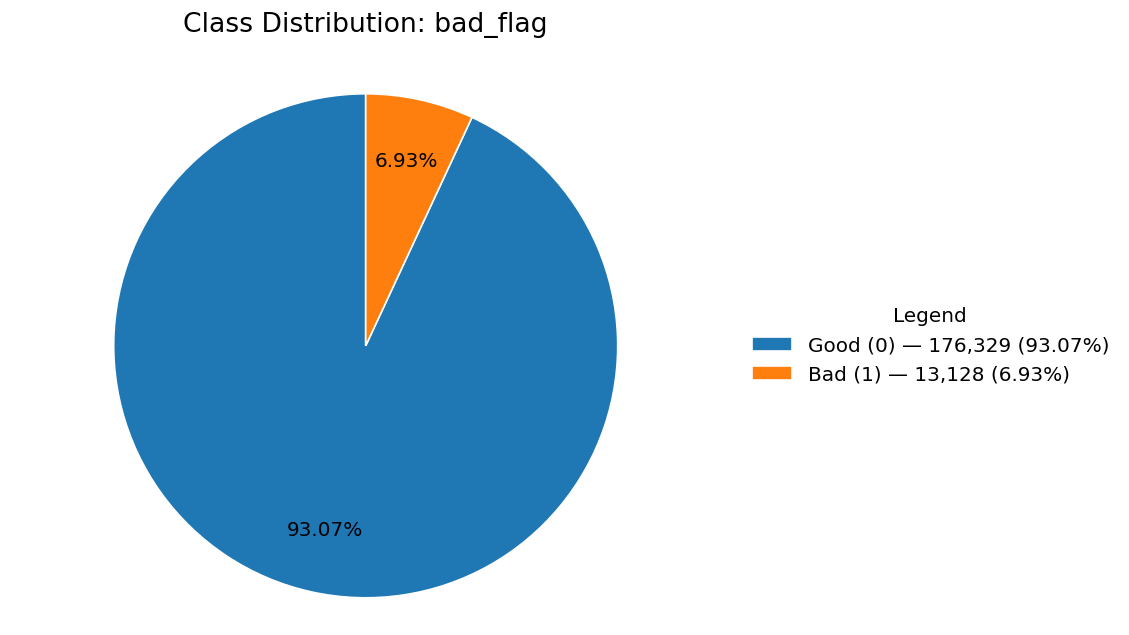

In [9]:

import matplotlib.pyplot as plt

y = df_eda['bad_flag'].astype(int)
counts = y.value_counts().reindex([0, 1], fill_value=0)
props = counts / counts.sum() * 100

fig, ax = plt.subplots(figsize=(9, 6), dpi=120) 
wedges, texts, autotexts = ax.pie(
    counts.values,
    autopct=lambda p: f'{p:.2f}%',
    startangle=90,
    pctdistance=0.75,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    textprops={'fontsize': 13}   
)
for t in autotexts:
    t.set_fontsize(12)

ax.set_title('Class Distribution: bad_flag', fontsize=16, pad=22)
ax.axis('equal')

labels = ['Good (0)', 'Bad (1)']
legend_labels = [
    f'{labels[i]} — {counts.iloc[i]:,} ({props.iloc[i]:.2f}%)'
    for i in range(len(labels))
]
ax.legend(
    wedges, legend_labels, title='Legend',
    loc='center left', bbox_to_anchor=(1.02, 0.5),
    frameon=False, fontsize=12, title_fontsize=12
)

fig.subplots_adjust(right=0.78)
plt.show()


Bad (1) is a tiny slice compared to Good (0). This isn’t a 50/50 problem—it’s a rare-event problem. If we chase raw accuracy, a dumb model that predicts ‘always Good’ will look great and still miss every Bad case, which is useless.

So I’ll (1) use stratified train/val splits so the bad rate stays consistent, (2) make the model care about the minority with class weights or oversampling, and (3) judge performance with ROC-AUC but put extra emphasis on PR-AUC and recall/precision at a threshold that matches our costs. I’ll also check calibration so predicted bad rates roughly match what the pie shows. Bottom line: success means surfacing the few Bad (1) cases without flooding ops with false alarms.

## 7) Revolving Utilization Risk Curve (Deciles)

C:\Users\test1\AppData\Local\Temp\ipykernel_26512\592197125.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bad_rate = df_plot.groupby('bin')['bad_flag'].mean().reset_index()


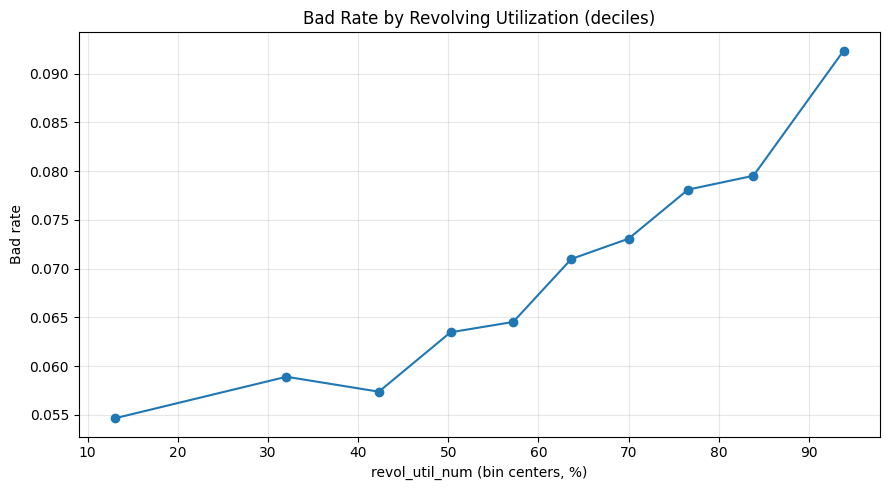

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_plot = df_eda[['revol_util_num','bad_flag']].dropna().copy()

df_plot['revol_util_num'] = df_plot['revol_util_num'].clip(lower=0, upper=100)

df_plot['bin'] = pd.qcut(df_plot['revol_util_num'], q=10, duplicates='drop')

bad_rate = df_plot.groupby('bin')['bad_flag'].mean().reset_index()
bad_rate['center'] = bad_rate['bin'].apply(lambda iv: iv.mid)

plt.figure(figsize=(9,5))
plt.plot(bad_rate['center'], bad_rate['bad_flag'], marker='o')
plt.title('Bad Rate by Revolving Utilization (deciles)')
plt.xlabel('revol_util_num (bin centers, %)'); plt.ylabel('Bad rate')
plt.grid(alpha=0.3); plt.tight_layout()
plt.show()


The decile plot shows a clear, monotonic risk lift as total revolving utilization rises. At low utilization (≈10–30%), the bad rate sits around 5–6%. It wobbles slightly near 40% (a tiny dip likely from sampling noise), then climbs steadily: mid-50s to low-60s utilization yields ~6–7%, 70–80% moves to ~7.5–8%, and once utilization exceeds ~85–90% the bad rate jumps past ~9%. In other words, each higher utilization band carries meaningfully higher default risk, with an accelerating increase beyond ~60% and a notable step-up beyond ~85%.

## 8) 75% vs Revolving Utilization (bad_flag highlighted)

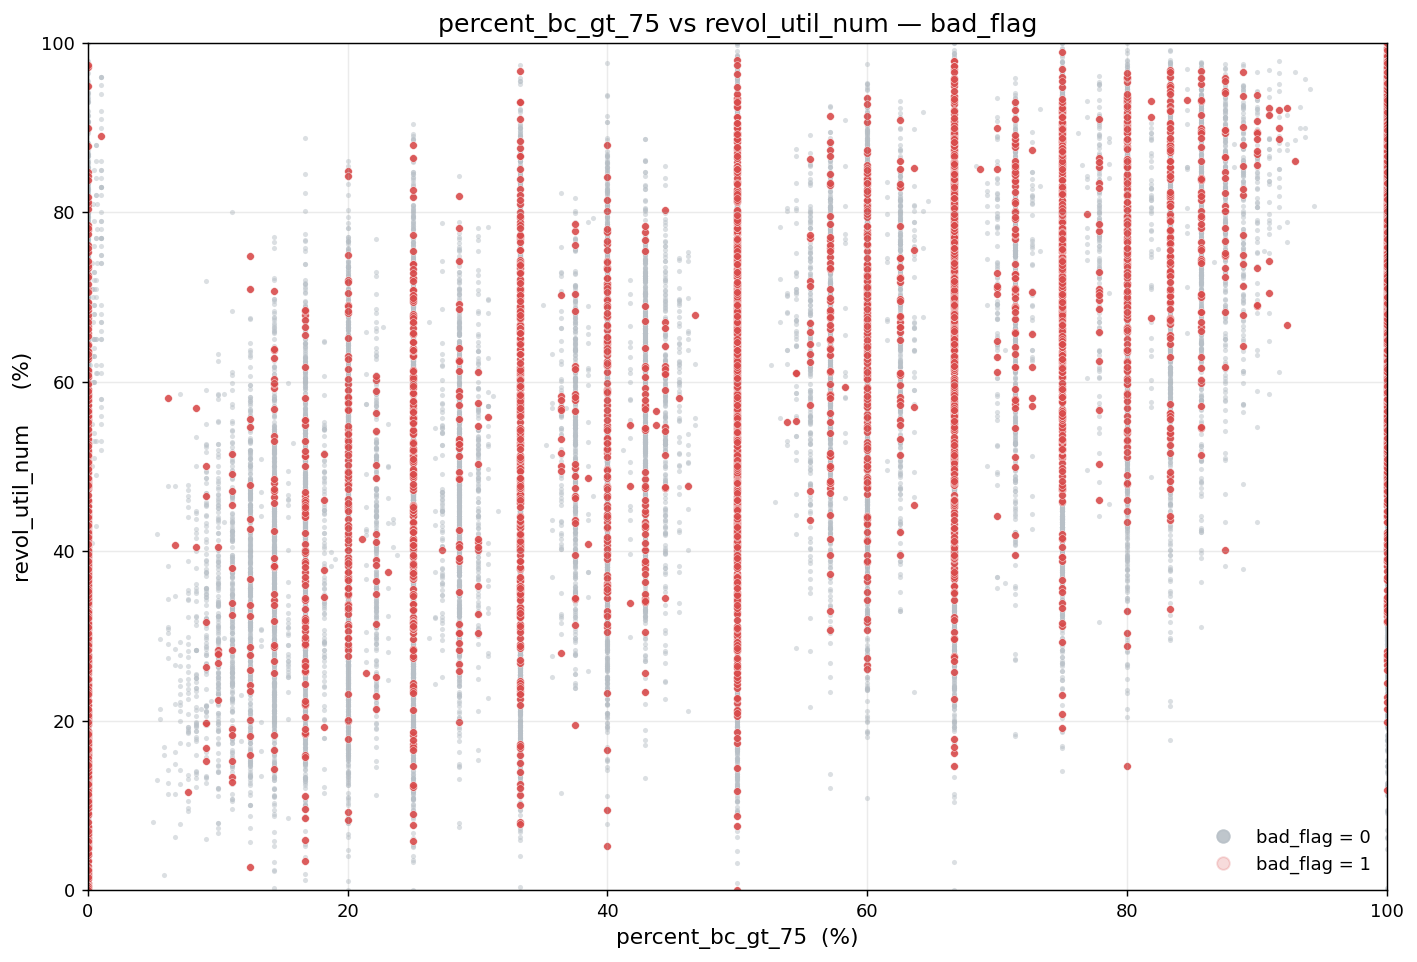

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

try:
    plt.style.use('seaborn-whitegrid')
except Exception:
    pass

need = ['percent_bc_gt_75','revol_util_num','bad_flag']
if not set(need).issubset(df_eda.columns):
    print(list(set(need) - set(df_eda.columns)))
else:

    dfp = df_eda[need].copy()
    for c in ['percent_bc_gt_75','revol_util_num']:
        dfp[c] = pd.to_numeric(dfp[c], errors='coerce')
    y = pd.to_numeric(dfp['bad_flag'], errors='coerce')
    dfp = dfp[y.isin([0,1])].dropna(subset=['percent_bc_gt_75','revol_util_num']).copy()
    dfp['bad_flag'] = y.loc[dfp.index].astype(int)

    dfp['percent_bc_gt_75'] = dfp['percent_bc_gt_75'].clip(0,100)
    dfp['revol_util_num']   = dfp['revol_util_num'].clip(0,100)

    N = 80000
    if len(dfp) > N:
        dfp = dfp.sample(N, random_state=42)

    good = dfp['bad_flag'] == 0
    bad  = dfp['bad_flag'] == 1

    good_color = '#B8C0C7'   
    bad_color  = '#D94B4B' 

    plt.figure(figsize=(11, 7.5), dpi=130)

    plt.scatter(
        dfp.loc[good, 'percent_bc_gt_75'],
        dfp.loc[good, 'revol_util_num'],
        s=8, c=good_color, alpha=0.5, linewidths=0, rasterized=True
    )

    plt.scatter(
        dfp.loc[bad, 'percent_bc_gt_75'],
        dfp.loc[bad, 'revol_util_num'],
        s=18, c=bad_color, alpha=0.9, linewidths=0.25, edgecolors='white', rasterized=True
    )

    plt.xlim(0,100); plt.ylim(0,100)
    plt.xlabel('percent_bc_gt_75  (%)', fontsize=12)
    plt.ylabel('revol_util_num     (%)', fontsize=12)
    plt.title('percent_bc_gt_75 vs revol_util_num — bad_flag', fontsize=14)
    plt.grid(alpha=0.25)

    h0 = mlines.Line2D([], [], color=good_color, marker='o', linestyle='None', markersize=7, label='bad_flag = 0', alpha=0.9)
    h1 = mlines.Line2D([], [], color=bad_color,  marker='o', linestyle='None', markersize=7, label='bad_flag = 1', alpha=0.2)
    plt.legend(handles=[h0, h1], frameon=False, loc='best')

    plt.tight_layout()
    plt.show()


Interpretation. This chart relates percent_bc_gt_75 (share of bankcards above 75% utilization) to revol_util_num (overall revolving utilization), colored by bad_flag. Default risk rises monotonically along both axes: the lower-left region (percent_bc_gt_75 < 20% and revol_util_num < 40%) is dominated by goods, while the upper-right (percent_bc_gt_75 > 60% and revol_util_num > 70%) shows a visibly higher density of bads. This suggests that having many near-maxed cards and high total utilization is a strong risk signal. The vertical bands on the x-axis come from rounded integer values, but the pattern remains clear—more cards over 75% and higher overall utilization jointly correlate with a higher probability of bad_flag = 1. I also observe heaping at round percentages—50, 60, 65—where bad_flag cases look more concentrated, likely due to discretization/rounding rather than true risk jumps

## 9) Top-6 Correlated Features — Histograms by bad_flag

Features used for histograms: ['int_rate_num', 'inq_last_6mths', 'mths_since_recent_inq', 'percent_bc_gt_75', 'total_bc_limit', 'tot_hi_cred_lim']


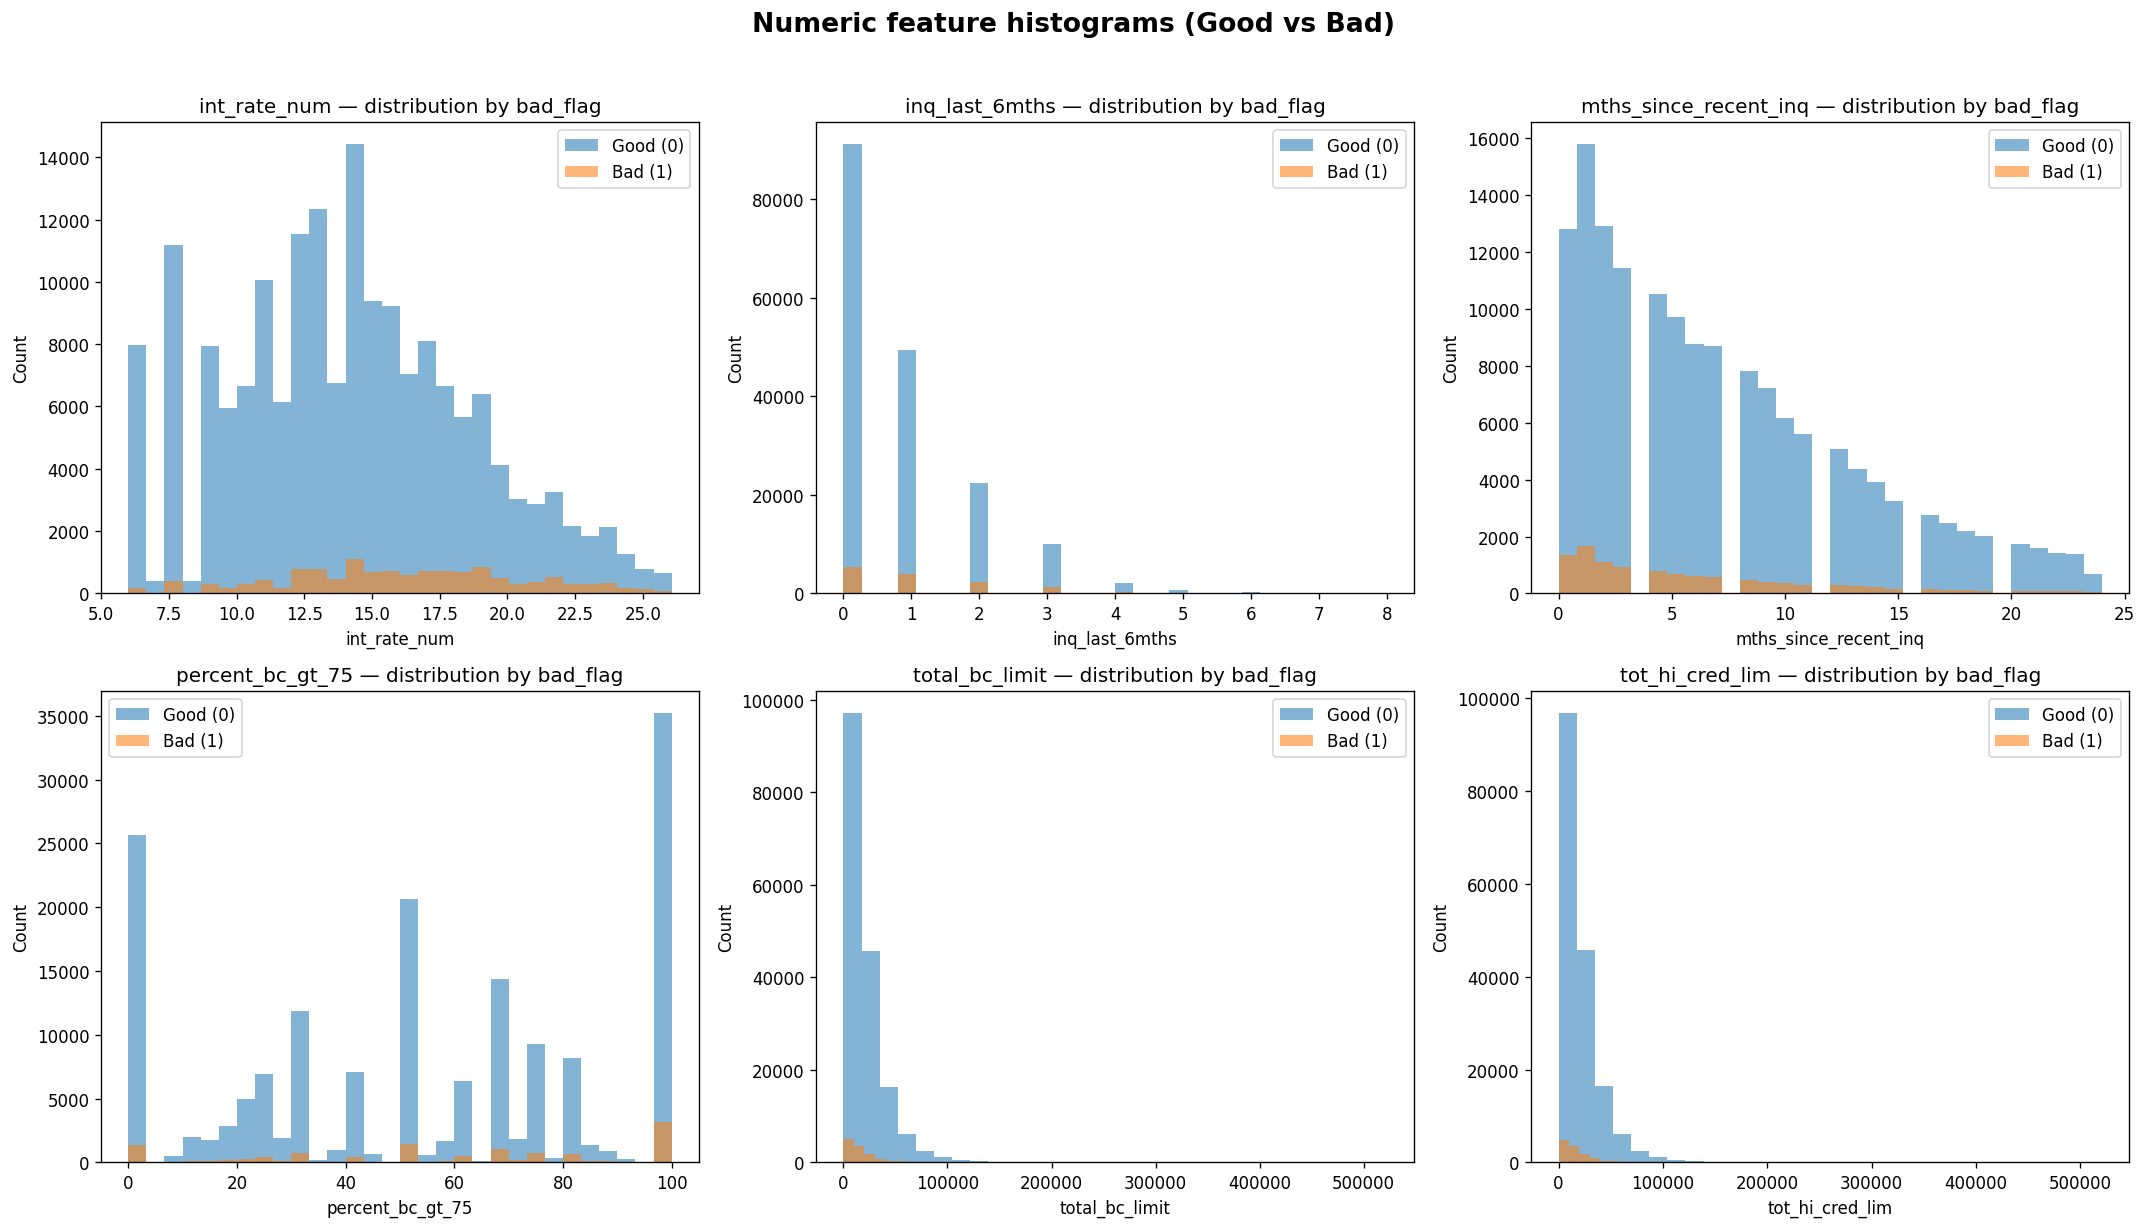

In [12]:
import numpy as np
import matplotlib.pyplot as plt

exclude = {'bad_flag','_bad_num','application_approved_flag','internal_score','id','member_id','desc','term'}
num_df = (
    df_eda
    .drop(columns=[c for c in exclude if c in df_eda.columns], errors='ignore')
    .select_dtypes('number')
)
corr_to_y = (
    num_df.join(df_eda['bad_flag'])
          .corr(numeric_only=True)['bad_flag']
          .drop('bad_flag')
          .abs()
          .sort_values(ascending=False)
)
topk = corr_to_y.head(6).index.tolist()
print("Features used for histograms:", topk)

good = (df_eda['bad_flag'] == 0)
bad  = (df_eda['bad_flag'] == 1)

n = len(topk)
rows = int(np.ceil(n / 3))
fig, axes = plt.subplots(rows, 3, figsize=(18, 5*rows), dpi=120)
axes = np.array(axes).reshape(-1)

for i, col in enumerate(topk):
    ax = axes[i]
    ax.hist(df_eda.loc[good, col].dropna(), bins=30, alpha=0.55, label='Good (0)')
    ax.hist(df_eda.loc[bad,  col].dropna(), bins=30, alpha=0.55, label='Bad (1)')
    ax.set_title(f'{col} — distribution by bad_flag')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.legend()

for j in range(i+1, len(axes)):
    axes[j].axis('off')

fig.suptitle('Numeric feature histograms (Good vs Bad)', y=1.02, fontsize=16, fontweight='bold')
fig.tight_layout()
plt.show()


inq_last_6mths (recent hard pulls). Most applicants sit at 0–2 inquiries, and the Bad (1) bars get noticeably thicker around 2–3. That’s classic “credit seeking” risk—people shopping for/depending on new credit. I’d keep this feature, cap it at 3 (0,1,2,≥3) or bin it, so the tail doesn’t add noise while still preserving the lift.

mths_since_recent_inq (months since last pull). The histogram is sharply left-skewed and bads concentrate at very small values (0–3 months). This is the mirror image of the first feature: a very recent pull aligns with higher risk. Treat it as monotonic (smaller → riskier); an inverse or binned version (e.g., 0,1–3,4–6,>6) will be stable.

percent_bc_gt_75 (share of bankcards over 75% utilized). You see spikes at neat values (50/75/100) because of bureau rounding, and the red overlay thickens as the share increases—especially near 100%. That’s a strong stress signal: many cards close to the limit. I’d either keep it numeric with capping [0,100] or use intuitive bins (0, (0,25], (25,50], (50,75], (75,100]) to capture the step-up in risk.

total_bc_limit (total bankcard limit). Heavy right tail; bads cluster in the low-limit region. Lower capacity often means thinner/younger files or weaker credit. Log-transform (log1p) or winsorize to tame the tail; expect a negative relationship to risk after transformation (higher limits → lower bad rate, all else equal).

tot_hi_cred_lim (total highest credit limit). Same story as total_bc_limit—long tail and more bads at the low end—so it corroborates the “capacity matters” theme. It may overlap strongly with total_bc_limit; I’d keep both for now but watch multicollinearity, letting regularization decide or later consolidating into a single “capacity index.”

bc_util (overall bankcard utilization %). As utilization rises, the bad overlay thickens; your bad-rate-by-decile plot shows a clear climb from ~60% and a sharp step above ~80–90%. This is a powerful, monotonic predictor. Cap at 100 and consider nonlinear treatment (knots/bins around 60/80/90). Also worth interacting with percent_bc_gt_75 to capture the “many cards high & overall high” risk pocket.

## 10) Correlation heatmap

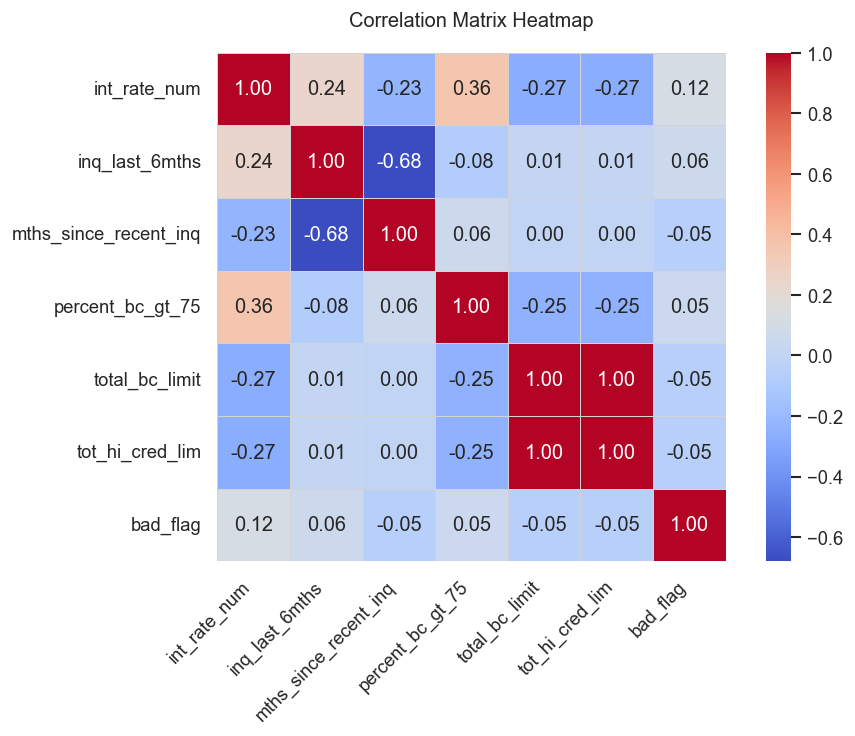

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

exclude = {'bad_flag', '_bad_num', 'application_approved_flag',
           'internal_score', 'id', 'member_id', 'desc', 'term'}

num_df = (
    df_eda.drop(columns=[c for c in exclude if c in df_eda.columns], errors='ignore')
          .select_dtypes('number')
)

corr_to_y = (
    num_df.join(df_eda['bad_flag'])
          .corr(numeric_only=True)['bad_flag']
          .drop('bad_flag')
          .abs()
          .sort_values(ascending=False)
)
topk = corr_to_y.head(6).index.tolist()

cols_for_corr = topk + ['bad_flag']
corr_mat = df_eda[cols_for_corr].corr(numeric_only=True).round(2)

try:
    import seaborn as sns
    sns.set(style='darkgrid')
    plt.figure(figsize=(1.2*len(cols_for_corr), 0.9*len(cols_for_corr)), dpi=120)
    ax = sns.heatmap(
        corr_mat, annot=True, fmt=".2f", cmap='coolwarm',
        linewidths=.5, linecolor='lightgray', square=True, cbar=True
    )
    ax.set_title('Correlation Matrix Heatmap', pad=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
except Exception:
    fig, ax = plt.subplots(figsize=(1.2*len(cols_for_corr), 0.9*len(cols_for_corr)), dpi=120)
    im = ax.imshow(corr_mat, cmap='coolwarm')
    ax.set_xticks(range(len(cols_for_corr)))
    ax.set_xticklabels(cols_for_corr, rotation=45, ha='right')
    ax.set_yticks(range(len(cols_for_corr)))
    ax.set_yticklabels(cols_for_corr)
    for (r, c), val in np.ndenumerate(corr_mat.values):
        ax.text(c, r, f'{val:.2f}', ha='center', va='center', fontsize=9)
    ax.set_title('Correlation Matrix Heatmap', pad=16)
    fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    fig.tight_layout()
    plt.show()



What the heatmap tells us. Two feature pairs are nearly duplicates: total_bc_limit vs tot_hi_cred_lim (≈1.00) and percent_bc_gt_75 vs bc_util (≈0.83). That’s classic multicollinearity—keep one from each pair (or regularize) so the model doesn’t waste capacity on redundant signals. Inquiry recency behaves as expected: inq_last_6mths is strongly negative with mths_since_recent_inq (≈−0.68), i.e., more recent pulls → fewer months since last pull. Capacity features are moderately negative with utilization (≈−0.25 to −0.29): higher limits generally mean lower revolving usage. Finally, the direct linear correlations with bad_flag are small (~0.04–0.06). That tells us the target signal is likely non-linear and interaction-driven

## 11) Univariate AUC and Information Value

C:\Users\test1\AppData\Local\Temp\ipykernel_26512\2628934641.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = tmp.groupby('bin')['y'].agg(['count','sum'])
C:\Users\test1\AppData\Local\Temp\ipykernel_26512\2628934641.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = tmp.groupby('bin')['y'].agg(['count','sum'])
C:\Users\test1\AppData\Local\Temp\ipykernel_26512\2628934641.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence 

Top 30 by |univariate AUC|, then IV:
                             spearman  uni_auc_signed      iv  abs_auc
int_rate                          NaN          0.6953  0.5264   0.6953
int_rate_num                   0.1208          0.6373  0.2481   0.6373
annual_inc                    -0.0598         -0.5680  0.0569   0.5680
mths_since_recent_inq         -0.0591         -0.5673  0.0575   0.5673
inq_last_6mths                 0.0605          0.5631  0.0399   0.5631
total_bc_limit                -0.0531         -0.5616  0.0494   0.5616
tot_hi_cred_lim               -0.0528         -0.5613  0.0487   0.5613
purpose                           NaN          0.5567  0.0583   0.5567
bc_util                        0.0485          0.5564  0.0418   0.5564
percent_bc_gt_75               0.0487          0.5561  0.0402   0.5561
tot_cur_bal                   -0.0404         -0.5499  0.0354   0.5499
revol_util_num                 0.0425          0.5483  0.0293   0.5483
home_ownership                    NaN   

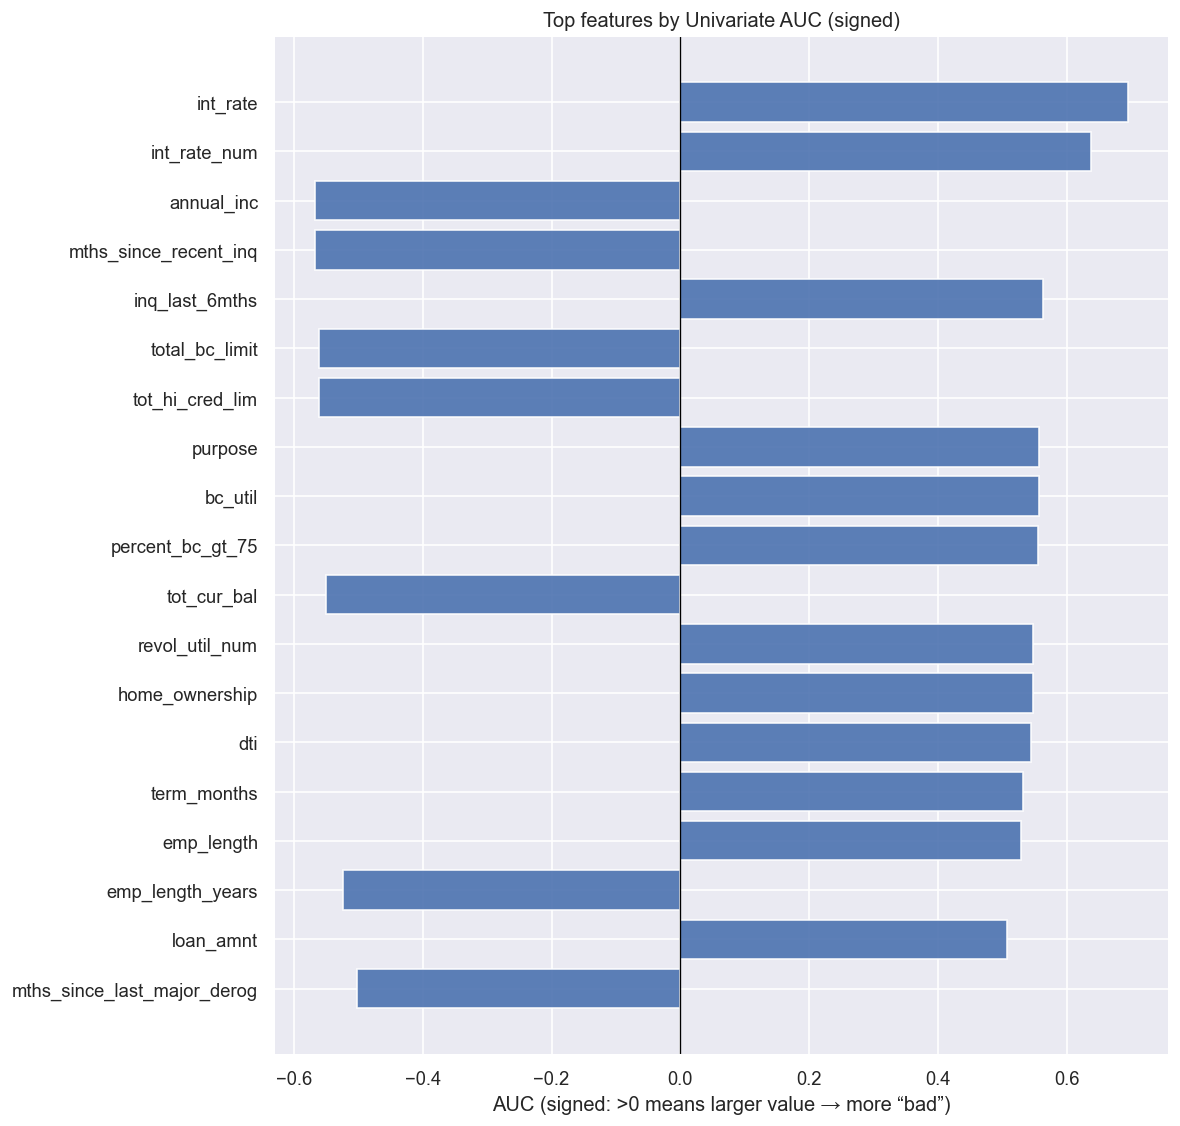

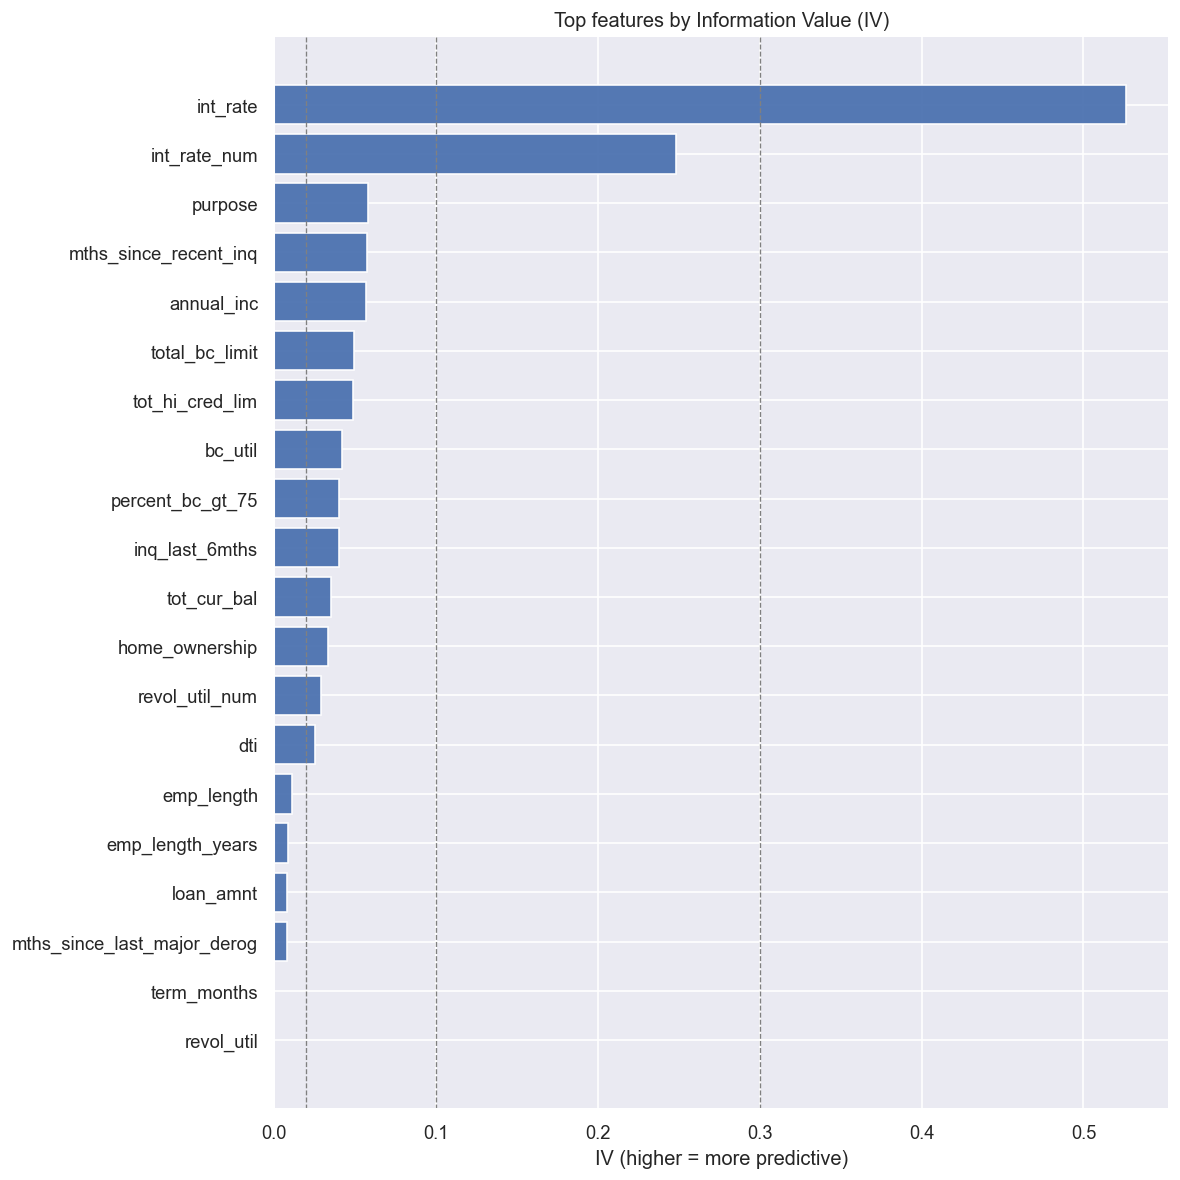

In [14]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

dfm = df_eda.copy()
y = pd.to_numeric(dfm['bad_flag'], errors='coerce')
mask = y.isin([0, 1])
dfm = dfm.loc[mask].copy()
y = y.loc[mask].astype(int)

exclude = {'bad_flag','_bad_num','application_approved_flag','internal_score','id','member_id','desc','term'}
num_df = dfm.drop(columns=[c for c in exclude if c in dfm.columns], errors='ignore').select_dtypes('number')
cat_df = dfm.drop(columns=[c for c in exclude if c in dfm.columns], errors='ignore').select_dtypes(exclude=[np.number])

spearman = num_df.join(y.rename('bad_flag')).corr(method='spearman')['bad_flag'].drop('bad_flag')

aucs = {}

for col in num_df.columns:
    x = num_df[col]
    m = x.notna()
    if m.sum() < 2 or y.loc[m].nunique() < 2:
        continue
    auc = roc_auc_score(y.loc[m], x.loc[m])
    sign = 1
    if auc < 0.5: 
        auc = 1 - auc
        sign = -1
    aucs[col] = sign * auc

for col in cat_df.columns:
    x = cat_df[col].astype('object')
    if x.nunique() > 1000: 
        continue
    means = y.groupby(x).mean()
    score = x.map(means)
    m = score.notna()
    if m.sum() < 2 or y.loc[m].nunique() < 2:
        continue
    auc = roc_auc_score(y.loc[m], score.loc[m])
    sign = 1
    if auc < 0.5:
        auc = 1 - auc
        sign = -1
    aucs[col] = sign * auc

aucs = pd.Series(aucs)

def iv_woe_for_feature(x: pd.Series, y: pd.Series, bins=10, treat_as_categorical=False):
    s = x.copy()
    if not treat_as_categorical and pd.api.types.is_numeric_dtype(s):
        try:
            b = pd.qcut(s, q=bins, duplicates='drop')
        except Exception:
            b = pd.cut(s, bins=bins)
    else:
        b = s.astype('object')

    tmp = pd.DataFrame({'bin': b, 'y': y}).dropna()
    if tmp.empty:
        return np.nan

    g = tmp.groupby('bin')['y'].agg(['count','sum'])
    g['good'] = g['count'] - g['sum']
    total_bad  = g['sum'].sum()
    total_good = g['good'].sum()
    eps = 1e-9
    g['bad_dist']  = (g['sum']  + eps) / (total_bad  + eps)
    g['good_dist'] = (g['good'] + eps) / (total_good + eps)
    g['woe'] = np.log(g['bad_dist'] / g['good_dist'])
    g['iv']  = (g['bad_dist'] - g['good_dist']) * g['woe']
    return g['iv'].sum()

ivs = {}

for col in num_df.columns:
    ivs[col] = iv_woe_for_feature(dfm[col], y, bins=10, treat_as_categorical=False)

for col in cat_df.columns:
    x = cat_df[col].astype('object')
    if x.nunique() > 200:
        vc = x.value_counts()
        rare = vc[vc < max(5, 0.005*len(x))].index
        x = x.mask(x.isin(rare), 'OTHER')
    ivs[col] = iv_woe_for_feature(x, y, treat_as_categorical=True)

ivs = pd.Series(ivs)

metrics = pd.concat({
    'spearman': spearman,              
    'uni_auc_signed': aucs,      
    'iv': ivs          
}, axis=1)

metrics_view = metrics.copy()
metrics_view['abs_auc'] = metrics_view['uni_auc_signed'].abs()
metrics_view = metrics_view.sort_values(['abs_auc','iv'], ascending=[False, False])
print("Top 30 by |univariate AUC|, then IV:")
print(metrics_view.head(30).round(4))

rank_auc = metrics['uni_auc_signed'].dropna().sort_values(key=lambda s: s.abs(), ascending=False).head(20)
rank_iv  = metrics['iv'].dropna().sort_values(ascending=False).head(20)

fig, ax = plt.subplots(figsize=(10, max(4, 0.45*len(rank_auc)+1)), dpi=120)
ax.barh(rank_auc.index[::-1], rank_auc.values[::-1], alpha=0.9)
ax.axvline(0, color='black', lw=0.8)
ax.set_title('Top features by Univariate AUC (signed)')
ax.set_xlabel('AUC (signed: >0 means larger value → more “bad”)')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(10, max(4, 0.45*len(rank_iv)+1)), dpi=120)
ax.barh(rank_iv.index[::-1], rank_iv.values[::-1], alpha=0.95)
for thr in [0.02, 0.1, 0.3]:
    ax.axvline(thr, color='gray', lw=0.8, ls='--')
ax.set_title('Top features by Information Value (IV)')
ax.set_xlabel('IV (higher = more predictive)')
plt.tight_layout()
plt.show()



The two ranking exhibits convey a consistent narrative. Interest rate (int_rate/int_rate_num) dominates both the signed univariate AUC and the Information Value, which strongly suggests embedded risk-pricing and potential target leakage; for a credit-risk model we should exclude rate variables. Once rate is removed, the principal sources of signal are the utilization family (revol_util_num, bc_util, percent_bc_gt_75): their positive signed AUCs and non-trivial IVs align with our earlier scatter and decile plots showing monotonic increases in bad rate as utilization rises and as a larger share of bankcards exceed 75% usage. Capacity/limit measures (tot_hi_cred_lim, total_bc_limit, tot_cur_bal) exhibit protective effects (negative signed AUC) but are highly collinear, so a single representative or regularization is advisable. Inquiry timing and intensity behave as expected—more/closer inquiries correspond to higher risk—while purpose and home_ownership contribute modest, secondary discrimination. Overall, aside from rate, most IVs fall below 0.1, indicating weak-to-moderate univariate power; therefore, performance will rely on combining features rather than any single predictor. 

## 12) Data Hygiene Checks

In [15]:

# find Duplicated ids
if 'id' in df_eda.columns:
    dup_count = int(df_eda['id'].duplicated().sum())
    print("Duplicate ids:", dup_count)

few_uniques = {c: df_eda[c].nunique(dropna=False) for c in df_eda.columns}
few_uniques = {k:v for k,v in few_uniques.items() if v <= 2}
few_uniques


Duplicate ids: 1334


{'term': 2, 'application_approved_flag': 1, 'bad_flag': 2, 'term_months': 2}